In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.volumetric_datasets import VolumeDatasetInMemory
from src.preprocessing.main_create_mu_spheres_dataset import interface_type_generator
from src.interface_representation.interface_types import InterfaceType

logging.basicConfig(level=logging.INFO)

In [2]:
base_dir = Path('../../src/preprocessing')

In [3]:

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skimage


def visualise_dataset_sample(arr, title=None):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    if title is not None:
        plt.suptitle(title)

    fig.tight_layout()
    plt.show()
    plt.close()

def visualise_surface_array(arrs, interface_type, outpath=None):
    if interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        level = 0.0
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        level = 0.0
    else:
        level = 0.5

    assert len(arrs) == 3

    fig = plt.figure(figsize=(2, 6), dpi=200)

    for i in range(3):
        ax = fig.add_subplot(3, 1, i+1, projection="3d")
        ax.set_xlim(0, 64)
        ax.set_ylim(0, 64)
        ax.set_zlim(0, 64)

        verts, faces, normals, values = skimage.measure.marching_cubes(
            arrs[i].squeeze(), level, spacing=(1, 1, 1), allow_degenerate=False, method='lewiner'
        )

        while len(faces) > 500_000:
            faces = faces[::2]

        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor((0, 0, 0, 0.2))  # RGBA: black, 20% opacity
        mesh.set_linewidth(0.05)
        mesh.set_alpha(0.5)
        ax.add_collection3d(mesh)

        ax.grid(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    plt.tight_layout()

    if outpath is not None:
        plt.savefig(outpath)

    plt.show()




INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in ../../src/preprocessing/data/mu_spheres/spheres_mu_1.00/SIGNED_DISTANCE_EXACT
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_1.00/SIGNED_DISTANCE_EXACT/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed splits of size: train=2000, val=500
INFO:src.datasets.volumetric_datasets:Loaded 500 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_1.00/SIGNED_DISTANCE_EXACT/spheres_549.npz
INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])


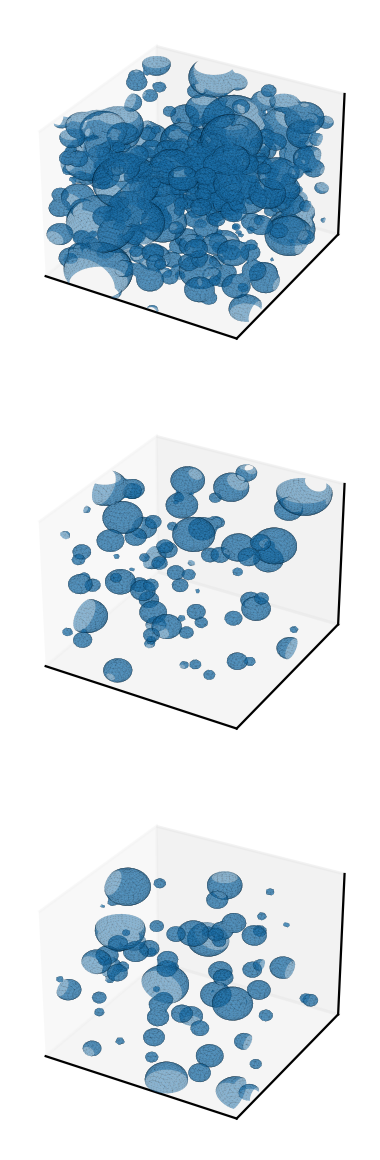

INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in ../../src/preprocessing/data/mu_spheres/spheres_mu_2.00/SIGNED_DISTANCE_EXACT
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_2.00/SIGNED_DISTANCE_EXACT/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed splits of size: train=2000, val=500
INFO:src.datasets.volumetric_datasets:Loaded 500 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_2.00/SIGNED_DISTANCE_EXACT/spheres_549.npz
INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])


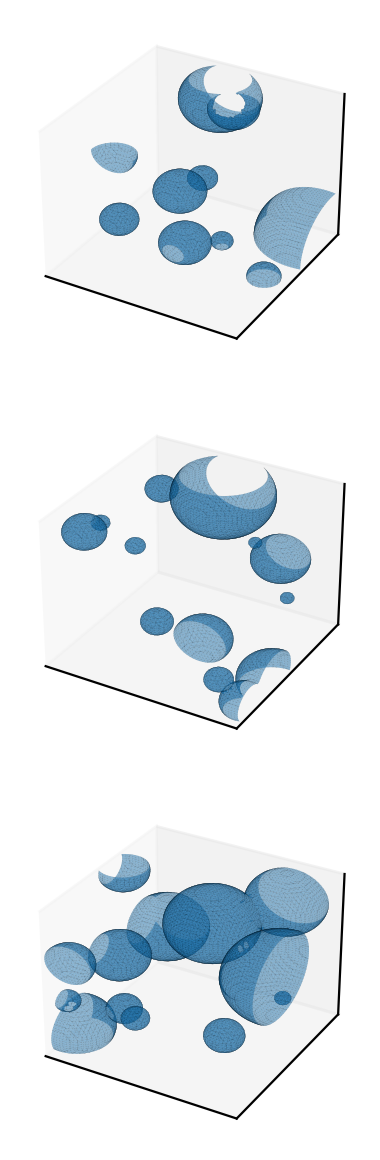

INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in ../../src/preprocessing/data/mu_spheres/spheres_mu_2.50/SIGNED_DISTANCE_EXACT
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_2.50/SIGNED_DISTANCE_EXACT/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed splits of size: train=2000, val=500
INFO:src.datasets.volumetric_datasets:Loaded 500 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/mu_spheres/spheres_mu_2.50/SIGNED_DISTANCE_EXACT/spheres_549.npz
INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])


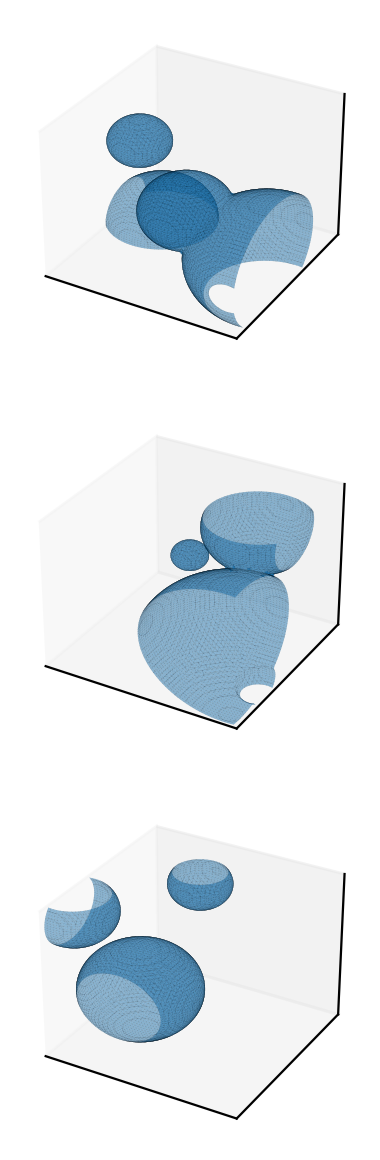

In [4]:
interface_types = [
        InterfaceType.SIGNED_DISTANCE_EXACT,
        InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
        InterfaceType.HEAVISIDE,
        InterfaceType.TANH_EPSILON,
    ]

epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]

mus = [1.0, 2.0, 2.5]


for mu in mus:
    
    for interface_type, epsilon, outdir in interface_type_generator(interface_types, epsilons, mu):
        
        dataset = VolumeDatasetInMemory(base_dir / outdir, split='val')
        
        inds = [0, 50, 100]
        arrs = [dataset[i].numpy() for i in inds]
        outpath = f"output/sphere_samples_{interface_type.name}_{epsilon}_{mu}.pdf"
        visualise_surface_array(arrs, interface_type, outpath=outpath)
        
        break
        


In [5]:
# First, check that all datasets have same length

In [6]:
# Visualise first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    visualise_dataset_sample(dataset[2], title=interface_type[0])


NameError: name 'datasets' is not defined

In [ ]:
# Visualise 3D reconstruction of first sample from each dataset

from src.plotting_utils import show_isosurface_plot_from_arr

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    if interface_type[0] is InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        level = 0.0
    elif interface_type[0] is InterfaceType.SIGNED_DISTANCE_EXACT:
        level = 0.0
    else:
        level = 0.5
    show_isosurface_plot_from_arr(dataset[0].squeeze().numpy(), level=level, N=64, verbose=False)
    

In [ ]:
def visualise_grad_magnitude(arr):
    dx = 1 / 64
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()
    

In [ ]:
# Visualise gradient magnitude of first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    print(interface_type[0])
    visualise_grad_magnitude(dataset[0])


In [ ]:
# Get the volume fraction dataset and check the distribution of total occupied volume over samples

it = InterfaceType.HEAVISIDE
dataset = SpheresDataset(base_dir / interface_type_generator([it], [None]).__next__()[2], split='val', debug=False)

vol_fracs = []

for i in range(len(dataset)):
    vol_fracs.append(np.sum(dataset[i].squeeze().numpy()) / dataset[i].numel())
    
plt.hist(vol_fracs, bins=20)